In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('/Users/psvkaushik/Desktop/ML/default of credit card clients.xls',header =1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.rename({'default payment next month' : 'Default'}, axis = 'columns',inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.drop('ID', axis = 1,inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
X2: Gender (1 = male; 2 = female). 
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
X4: Marital status (1 = married; 2 = single; 3 = others). 
X5: Age (year). 
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [7]:
df['SEX'].unique()

array([2, 1])

In [8]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [9]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [10]:
len(df.loc[(df['EDUCATION']==0)| (df['MARRIAGE'] == 0)])

68

In [11]:
len(df)

30000

68 out of 30000 does not account to much, so we can remove them.

In [12]:
df_no_missing = df.loc[(df['EDUCATION']!=0) & (df['MARRIAGE'] != 0)]

In [13]:
len(df_no_missing)

29932

In [14]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [15]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

In [16]:
df_no_default = df_no_missing.loc[df_no_missing['Default']==0]
df_default = df_no_missing.loc[df_no_missing['Default']==1]

In [17]:
df_no_default_downsampled = resample(df_no_default,
                                     replace = False,
                                     n_samples = 1000,
                                     random_state = 42)
len(df_no_default_downsampled)

1000

In [18]:
df_default_downsampled = resample(df_default,
                                 replace = False,
                                 n_samples = 1000,
                                 random_state = 42)
len(df_default_downsampled)

1000

In [19]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

In [20]:
X = df_downsample.drop('Default', axis = 1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [21]:
y = df_downsample['Default'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: Default, dtype: int64

In [23]:
X_encoded = pd.get_dummies(X, columns = ['SEX',
                                          'EDUCATION',
                                           'MARRIAGE',
                                          'PAY_0',
                                          'PAY_2',
                                          'PAY_3',
                                          'PAY_4',
                                          'PAY_5',
                                          'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler_sd = StandardScaler()
scaler_range = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

# Get scaling parameters with the train sample exclusively, using the Scaler.fit() function
scaler_sd.fit(X_train)
scaler_range.fit(X_train)

# Scale data using Scaler.transform()
X_train_scaled_sd = pd.DataFrame(scaler_sd.transform(X_train))
X_train_scaled_range = pd.DataFrame(scaler_range.transform(X_train))
X_test_scaled_sd = pd.DataFrame(scaler_sd.transform(X_test))
X_test_scaled_range = pd.DataFrame(scaler_range.transform(X_test))

In [25]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled_sd, y_train)

SVC(random_state=42)

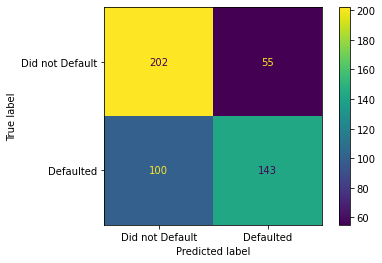

In [26]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled_sd,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not Default', 'Defaulted'])

In [34]:
param_grid =[
    {
    'C':[0.5,1, 10, 100],
    'gamma':['scale', 1, 0.1, 0.01, 0.001],
    'kernel':['rbf']}
]

optimal_params = GridSearchCV(
        SVC(),
    param_grid,
    cv =5,
    scoring = 'accuracy',
    verbose = 0
)

optimal_params.fit(X_train_scaled_sd, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [39]:
clf_svm = SVC(random_state = 49, C = 10, gamma = 0.001)
clf_svm.fit(X_train_scaled_sd, y_train)

SVC(C=10, gamma=0.001, random_state=49)

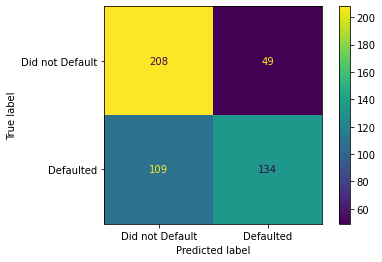

In [40]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled_sd,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not Default', 'Defaulted'])

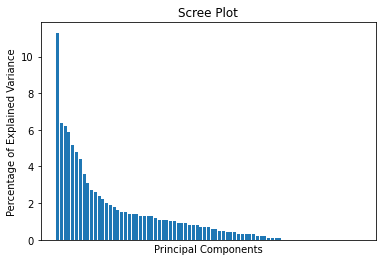

In [43]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled_sd)

per_var = np.round(pca.explained_variance_ratio_*100,decimals =1)
labels = [str(x) for x in range(1,len(per_var)+1)]

plt.bar(x =range(1,len(per_var)+1), height = per_var )

plt.tick_params(
axis ='x',
which = 'both',
bottom = False,
top = False,
labelbottom = False)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [45]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid =[
    {
    'C':[0.5,1, 10, 100],
    'gamma':['scale', 1, 0.1, 0.01, 0.001],
    'kernel':['rbf']}
]

optimal_params = GridSearchCV(
        SVC(),
    param_grid,
    cv =5,
    scoring = 'accuracy',
    verbose = 0
)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


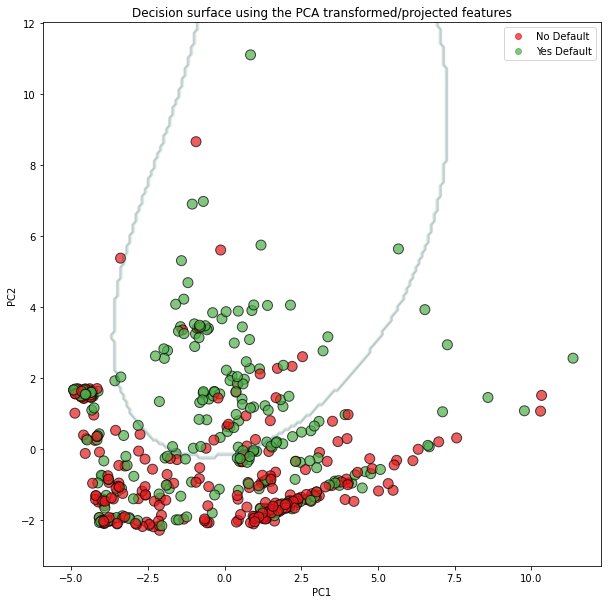

In [50]:
clf_svm = SVC(random_state = 49, C = 10, gamma = 0.01)
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_test_scaled_sd)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]


#matrix to show decision regions

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start =x_min, stop = x_max, step =0.1),
                    np.arange(start=y_min, stop = y_max, step = 0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize = (10,10))

ax.contour(xx, yy, Z, alpha = 0.1)

cmap = colors.ListedColormap(['#e41a1c','#4daf4a'])



scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c = y_test, cmap = cmap,
                    s=100,
                    edgecolors = 'k', # k = black
                    alpha = 0.7)

legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc = "upper right")

legend.get_texts()[0].set_text("No Default")
legend.get_texts()[1].set_text("Yes Default")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed/projected features')

plt.show()